# Class Imbalanced Problem 실습

이번 실습에서는 **Class Imbalanced Problem**을 체감해봅니다.
- 다수 클래스(90%)와 소수 클래스(10%)로 구성된 불균형 데이터셋 생성
- 신경망 학습 후 Accuracy는 높게 나오지만 소수 클래스 성능이 떨어지는 문제 확인
- Confusion Matrix와 Classification Report로 문제 체감

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## 1. 불균형 데이터셋 생성 (0 클래스 90%, 1 클래스 10%)

In [13]:
X, y = make_classification(
    n_samples=2000, n_features=20, n_informative=10, n_redundant=5,
    weights=[0.9, 0.1], n_classes=2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## 2. 신경망 모델 정의 및 학습

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(20,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, verbose=0)

## 3. 학습 곡선 시각화

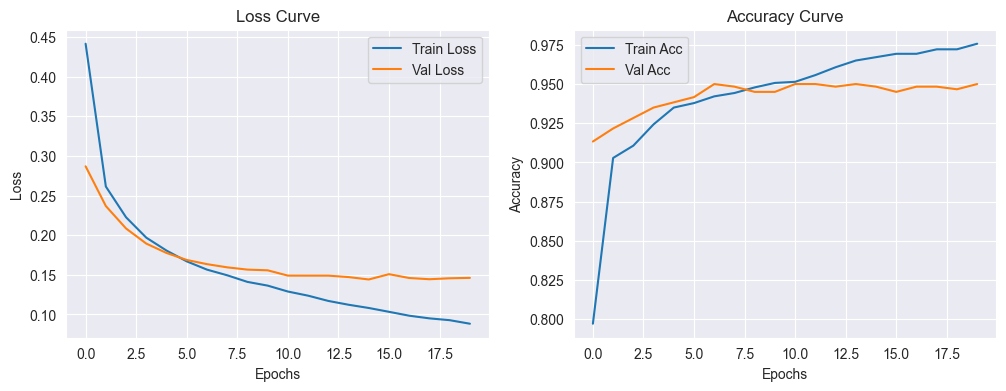

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 4. Confusion Matrix와 Classification Report로 성능 확인

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report (Imbalanced Data):
              precision    recall  f1-score   support

           0     0.9704    0.9740    0.9722       538
           1     0.7667    0.7419    0.7541        62

    accuracy                         0.9500       600
   macro avg     0.8685    0.8580    0.8631       600
weighted avg     0.9493    0.9500    0.9496       600



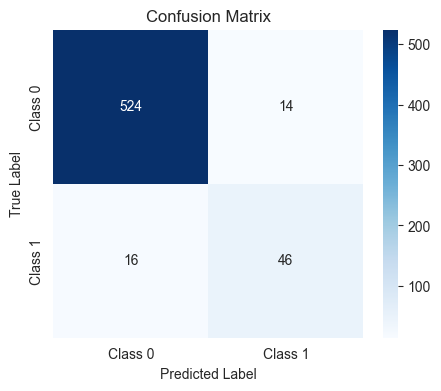

In [16]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Classification Report (Imbalanced Data):")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Classification Report (Imbalanced Data):
              precision    recall  f1-score   support

           0     0.4028    0.5800    0.4754        50
           1     0.2500    0.1400    0.1795        50

    accuracy                         0.3600       100
   macro avg     0.3264    0.3600    0.3274       100
weighted avg     0.3264    0.3600    0.3274       100



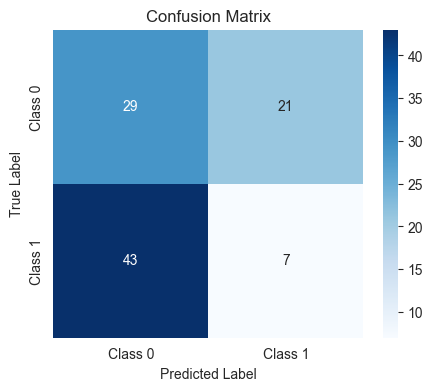

In [17]:
X_test, y_test = make_classification(
    n_samples=100, n_features=20, n_informative=10, n_redundant=5, n_classes=2, random_state=42
)

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Classification Report (Imbalanced Data):")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

### 생각해보기
- Accuracy가 높게 나오는 이유는 무엇일까요?
- 소수 클래스(1 클래스)의 성능이 낮게 나오는 이유는 무엇일까요?